Copyright 2022 The Zimtohrli Authors. All Rights Reserved.

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.

In [1]:
import json
import numpy as np
import scipy
import matplotlib.pyplot as plt

z_scores.shape=(3116,)
mos_scores.shape=(3116,)
mos_extremes=array([1, 5])
z_extremes=array([111.11403656,   0.        ])
res=  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 44.2629411710931
        x: [ 3.439e+00 -4.138e-02  3.008e+00 -1.354e-01]
      nit: 27
      jac: [-1.431e-06 -4.387e-05 -1.431e-06 -2.766e-05]
 hess_inv: [[ 2.251e+01 -2.873e-01  9.278e-02 -2.031e-01]
            [-2.873e-01  3.763e-03 -1.318e-03  2.550e-03]
            [ 9.278e-02 -1.318e-03  3.662e-03 -7.035e-04]
            [-2.031e-01  2.550e-03 -7.035e-04  2.035e-03]]
     nfev: 300
     njev: 60


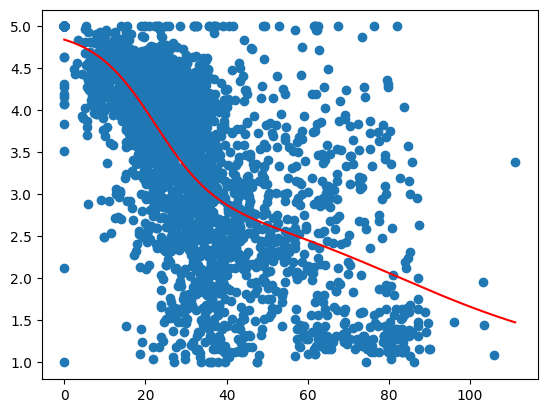

In [123]:
coresvnet_json = json.load(open('coresvnet.json'))
furball_json = json.load(open('furball.json'))
minimodal_json = json.load(open('minimodal.json'))

def append_scores(js_file, z_scoes, mos_scores, scale, offset):
  for ref in js_file:
    for dist in ref['Distortions']:
      z_scores.append(dist['Scores']['Zimtohrli'])
      mos_scores.append(dist['Scores']['MOS'] * scale + offset)

z_scores = []
mos_scores = []
append_scores(coresvnet_json, z_scores, mos_scores, 1, 0)
append_scores(furball_json, z_scores, mos_scores, 0.04, 1)
append_scores(minimodal_json, z_scores, mos_scores, 1, 0)

z_scores = np.asarray(z_scores)
mos_scores = np.asarray(mos_scores)
mos_extremes = np.asarray([1, 5])
z_extremes = np.asarray([np.max(z_scores), 0])

print(f'{z_scores.shape=}')
print(f'{mos_scores.shape=}')
print(f'{mos_extremes=}')
print(f'{z_extremes=}')

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def predict(z_score, params):
  return 1 + 2 * (sigmoid(params[0] + params[1] * z_score) + sigmoid(params[2] + params[3] * z_score))

def loss(params):
  return np.linalg.norm(mos_scores - predict(z_scores, params)) + mos_scores.shape[0] * 0.0005 * (np.linalg.norm(5 - predict(0, params)) + np.linalg.norm(1 - predict(200, params)))

res = scipy.optimize.minimize(loss, -np.ones((4,)), method='BFGS')
print(f'{res=}')
plt.scatter(z_scores, mos_scores)
x = np.linspace(0, z_extremes[0], 1000)
plt.plot(x, predict(x, res.x), 'r')
plt.show()
